__CalCOFI Hackathon Basic Framework Tester__

Packages:

In [21]:
import numpy as np  # provides multi-dimensional array and matrices functionality
import pandas as pd  # provides interface for interacting with tabular data
import matplotlib.pyplot as plt  # provides plotting tools
import seaborn as sns  # visualization tools
%matplotlib inline
from scipy.ndimage.filters import gaussian_filter
# %conda install folium -c conda-forge
import folium  # gis visualization

Import the data. Please change it to where you stode bottle.csv and CalCOFIStationOrder.csv

In [22]:
cc = pd.read_csv("bottle.csv")  # CalCOFI bottle data
coords = pd.read_csv("CalCOFIStationOrder.csv")

/Users/stevenwu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Cleaning Bottle Data:

In [23]:
surface = cc[cc['Depthm'] == 0]  # select surface level data

aspects = surface[['Sta_ID', 'Depth_ID', 'T_degC', 'Salnty', 'O2ml_L', 'ChlorA']].fillna(0)  # tentative data layers separation, replace NaNs with 0

yymm = list(aspects["Depth_ID"])  # using Depth_ID to extract year and month, add to dataframe
year = []
month = []
for i in yymm:
    yr = int(i[:2] + i[3:5])
    mon = int(i[5:7])
    year.append(yr)
    month.append(mon)

aspects.insert(1,"Year", year, True)
aspects.insert(2, "Month", month, True)
del aspects["Depth_ID"]

# We select year 2015 because it doesn't have the missing data
aspects_15 = aspects[aspects['Year']==2015]  # selecting April of 2015
spring_15 = aspects_15[aspects_15['Month']==4]
spring_15.head()

,Sta_ID,Year,Month,T_degC,Salnty,O2ml_L,ChlorA
850578,076.7 049.0,2015,4,11.510,33.5598,7.114,22.632
850588,076.7 051.0,2015,4,12.675,33.3538,6.647,2.522
850608,076.7 055.0,2015,4,13.669,33.2469,6.210,0.717
850638,076.7 060.0,2015,4,14.151,33.2475,6.320,1.537
850666,076.7 070.0,2015,4,15.318,33.1735,5.876,0.271


In [24]:
# reset the index and rename Sta_ID
spring_15 = spring_15.reset_index()

In [25]:
# I'm assuming first one is line, second one is Sta
spring_15['Line'] = spring_15['Sta_ID'].map(lambda x: float(x.split()[0]))

In [26]:
spring_15['Sta'] = spring_15['Sta_ID'].map(lambda x: float(x.split()[1]))

In [27]:
spring_15.head()

,index,Sta_ID,Year,Month,T_degC,Salnty,O2ml_L,ChlorA,Line,Sta
0,850578,076.7 049.0,2015,4,11.510,33.5598,7.114,22.632,76.7,49.0
1,850588,076.7 051.0,2015,4,12.675,33.3538,6.647,2.522,76.7,51.0
2,850608,076.7 055.0,2015,4,13.669,33.2469,6.210,0.717,76.7,55.0
3,850638,076.7 060.0,2015,4,14.151,33.2475,6.320,1.537,76.7,60.0
4,850666,076.7 070.0,2015,4,15.318,33.1735,5.876,0.271,76.7,70.0


Station ID Coordinate Data Manipulation:

In [28]:
# coords
lat_lon = coords[['Line', 'Sta', 'Lat (dec)', 'Lon (dec)']]
lat_lon.head()

,Line,Sta,Lat (dec),Lon (dec)
0,93.3,26.7,32.95637,-117.30538
1,93.4,26.4,32.94905,-117.27357
2,91.7,26.4,33.24350,-117.46542
3,93.3,28.0,32.91304,-117.39438
4,93.3,30.0,32.84637,-117.53122


In [29]:
spring_15_clean = spring_15.merge(lat_lon, on=['Line', 'Sta'], how='left')

In [30]:
spring_15_clean = spring_15_clean.rename(columns={'Lat (dec)':'Latitude', 'Lon (dec)':'Longitude'})

In [31]:
spring_15_clean.head()

,index,Sta_ID,Year,Month,T_degC,Salnty,O2ml_L,ChlorA,Line,Sta,Latitude,Longitude
0,850578,076.7 049.0,2015,4,11.510,33.5598,7.114,22.632,76.7,49.0,35.08824,-120.77740
1,850588,076.7 051.0,2015,4,12.675,33.3538,6.647,2.522,76.7,51.0,35.02158,-120.91782
2,850608,076.7 055.0,2015,4,13.669,33.2469,6.210,0.717,76.7,55.0,34.88824,-121.19831
3,850638,076.7 060.0,2015,4,14.151,33.2475,6.320,1.537,76.7,60.0,34.72158,-121.54828
4,850666,076.7 070.0,2015,4,15.318,33.1735,5.876,0.271,76.7,70.0,34.38824,-122.24608


In [32]:
# trying to visualize all stations, not successful
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = spring_15_clean[['Longitude', 'Latitude']]

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
#gdf.plot(ax=world[world.continent == 'North America'].plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

ImportError: cannot import name '_NDFrameIndexer' from 'pandas.core.indexing' (/Users/stevenwu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py)

In [33]:
spring_15_clean

,index,Sta_ID,Year,Month,T_degC,Salnty,O2ml_L,ChlorA,Line,Sta,Latitude,Longitude
0,850578,076.7 049.0,2015,4,11.510,33.5598,7.114,22.632,76.7,49.0,35.08824,-120.77740
1,850588,076.7 051.0,2015,4,12.675,33.3538,6.647,2.522,76.7,51.0,35.02158,-120.91782
2,850608,076.7 055.0,2015,4,13.669,33.2469,6.210,0.717,76.7,55.0,34.88824,-121.19831
3,850638,076.7 060.0,2015,4,14.151,33.2475,6.320,1.537,76.7,60.0,34.72158,-121.54828
4,850666,076.7 070.0,2015,4,15.318,33.1735,5.876,0.271,76.7,70.0,34.38824,-122.24608
...,...,...,...,...,...,...,...,...,...,...,...,...
65,852218,093.3 090.0,2015,4,17.518,33.1430,5.647,0.073,93.3,90.0,30.84637,-121.58965
66,852251,093.3 100.0,2015,4,17.338,33.2920,5.593,0.086,93.3,100.0,30.51304,-122.25760
67,852281,093.3 110.0,2015,4,17.988,33.5507,5.483,0.068,93.3,110.0,30.17971,-122.92324
68,852313,093.3 120.0,2015,4,17.792,33.3277,5.563,0.058,93.3,120.0,29.84637,-123.58661


Bellow is the Leaflet graph. We are trying to add layers to this map.

In [34]:
m = folium.Map(location=[32.879411,-117.211136], tiles="Stamen Terrain")
m

In [35]:

import numpy as np  # provides multi-dimensional array and matrices functionality
import pandas as pd  # provides interface for interacting with tabular data
import matplotlib.pyplot as plt  # provides plotting tools
import seaborn as sns  # visualization tools
%matplotlib inline
from scipy.ndimage.filters import gaussian_filter
# %conda install folium -c conda-forge
import folium  # gis visualization
from folium import plugins
from folium.plugins import HeatMap  # heatmap visualization package

In [36]:
spring_15_clean['T_weight'] = (5 + (spring_15_clean['T_degC'] - np.mean(spring_15_clean['T_degC'])) / np.std(spring_15_clean['T_degC']))**3

In [37]:
spring_15_clean

,index,Sta_ID,Year,Month,T_degC,Salnty,O2ml_L,ChlorA,Line,Sta,Latitude,Longitude,T_weight
0,850578,076.7 049.0,2015,4,11.510,33.5598,7.114,22.632,76.7,49.0,35.08824,-120.77740,13.143974
1,850588,076.7 051.0,2015,4,12.675,33.3538,6.647,2.522,76.7,51.0,35.02158,-120.91782,27.750621
2,850608,076.7 055.0,2015,4,13.669,33.2469,6.210,0.717,76.7,55.0,34.88824,-121.19831,46.544318
3,850638,076.7 060.0,2015,4,14.151,33.2475,6.320,1.537,76.7,60.0,34.72158,-121.54828,58.109859
4,850666,076.7 070.0,2015,4,15.318,33.1735,5.876,0.271,76.7,70.0,34.38824,-122.24608,93.702185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,852218,093.3 090.0,2015,4,17.518,33.1430,5.647,0.073,93.3,90.0,30.84637,-121.58965,195.381056
66,852251,093.3 100.0,2015,4,17.338,33.2920,5.593,0.086,93.3,100.0,30.51304,-122.25760,185.146401
67,852281,093.3 110.0,2015,4,17.988,33.5507,5.483,0.068,93.3,110.0,30.17971,-122.92324,223.867744
68,852313,093.3 120.0,2015,4,17.792,33.3277,5.563,0.058,93.3,120.0,29.84637,-123.58661,211.673706


In [38]:
m = folium.Map(location=[32.88719,-117.2546], tiles="Stamen Terrain")  # general mapping

for i in range(len(list(spring_15_clean['Latitude']))):  # station spring_15_clean
    folium.Marker(location=[list(spring_15_clean['Latitude'])[i],list(spring_15_clean['Longitude'])[i]], popup=list(spring_15_clean['Sta_ID'])[i], icon=folium.Icon(color="red", icon="info-sign", prefix='fa')).add_to(m)

heat_data = [[row['Latitude'],row['Longitude'],row['T_weight']] for index, row in spring_15_clean.iterrows()]

# Plot it on the map
HeatMap(heat_data,name='Temperatire(C)', min_opacity=0.3, max_zoom=18, radius=100, blur=30, gradient = None, overlay=True, control=True, show=False).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))

folium.LayerControl(position='topleft').add_to(m)

# Display the map
m

In [39]:
salt_data = [[row['Lat (dec)'],row['Lon (dec)'],row['Salnty']] for index, row in merged.iterrows()]
salt_data = np.array(salt_data)



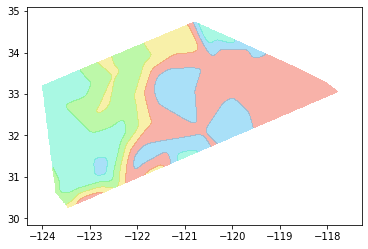

In [44]:
import numpy as np
import pandas as pd
import folium
import branca
from folium import plugins
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import geojsoncontour
import scipy as sp
import scipy.ndimage
 
# Setup
temp_mean = salt_data[:,2].mean()
temp_std  = salt_data[:,2].std()
debug     = False
 
# Setup colormap
colors = ['#55c3f2',  '#55f2c8',  '#7cf255',  '#f2e255',  '#f26755']
vmin   = temp_mean - 2 * temp_std
vmax   = temp_mean + 2 * temp_std
levels = len(colors)
cm     = branca.colormap.LinearColormap(colors, vmin=vmin, vmax=vmax).to_step(levels)
 
# Create a dataframe with fake data
# df = pd.DataFrame({
#     'longitude':   np.random.normal(-120,     0.15,     1000),
#     'latitude':    np.random.normal(33,     0.15,     1000),
#     'temperature': np.random.normal(temp_mean, temp_std, 1000)})
 
# The original data
x_orig = np.asarray(salt_data[:,1])
y_orig = np.asarray(salt_data[:,0])
z_orig = np.asarray(salt_data[:,2])
 
# Make a grid
x_arr          = np.linspace(np.min(x_orig), np.max(x_orig), 500)
y_arr          = np.linspace(np.min(y_orig), np.max(y_orig), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)
 
# Grid the values
z_mesh = griddata((x_orig, y_orig), z_orig, (x_mesh, y_mesh), method='linear')
 
# Gaussian filter the grid to make it smoother
sigma = [5, 5]
z_mesh = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')
 
# Create the contour
contourf = plt.contourf(x_mesh, y_mesh, z_mesh, levels, alpha=0.5, colors=colors, linestyles='None', vmin=vmin, vmax=vmax)
 
# Convert matplotlib contourf to geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.5)
 
# Set up the folium plot
geomap = folium.Map([salt_data[:,0].mean(), salt_data[:,1].mean()], zoom_start=6,tiles="Stamen Terrain")
 
# Plot the contour plot on folium
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': x['properties']['fill'],
        'opacity':   1,
    }, control=True, name='Salinity').add_to(geomap)
 
# Add the colormap to the folium map
cm.caption = 'Temperature'
geomap.add_child(cm)
 
# Fullscreen mode
#plugins.Fullscreen(position='topright', force_separate_button=True).add_to(folium.FeatureGroup(name='Salinity').add_to(geomap))

for i in range(len(list(spring_15_clean['Latitude']))):  # station spring_15_clean
    folium.Marker(location=[list(spring_15_clean['Latitude'])[i],list(spring_15_clean['Longitude'])[i]], popup=list(spring_15_clean['Sta_ID'])[i], icon=folium.Icon(color="red", icon="info-sign", prefix='fa')).add_to(geomap)



HeatMap(heat_data,name='Temperatire(C)', min_opacity=0.3, max_zoom=18, radius=100, blur=30, gradient = None, overlay=True, control=True, show=False).add_to(folium.FeatureGroup(name='Heat Map').add_to(geomap))

folium.LayerControl(position='topleft').add_to(geomap)

geomap